

[**3. Note: The curse of dimensionality (in Machine Learning)**](#curse) <br>

[3.1 Introduction](#intro)<br>
&nbsp; &nbsp;   [Challenges with High-Dimensional Feature Spaces](#challenges)<br>
&nbsp; &nbsp;   [Hughes phenomenon](#hughes)<br>
&nbsp; &nbsp;   [Distance Measures in High Dimensions](#distance)<br>
&nbsp; &nbsp;&nbsp; &nbsp;   [Distances to nearest and farthest points as $p$ increases](#p)<br>


[3.2 Mitigation Strategies ](#mitigation)<br>

[3.3 Regularization](#reg)<br>
&nbsp; &nbsp; [Regularization in linear regression](#reg1)<br>
&nbsp; &nbsp; [Ridge](#ridge)<br>
&nbsp; &nbsp; [Lasso](#lasso)<br>
&nbsp; &nbsp; [Elastic Net](#elastic)<br>
&nbsp; &nbsp; [Regularization in kNN](#knn)<br>

[3.4 Feature selection](#sel)<br>

&nbsp; &nbsp; [Univariate feature selection](#univ)<br>
&nbsp; &nbsp;&nbsp; &nbsp; [Compare LinearSVC (SVM for classification) with and without univariate feature selection](#svmuniv)<br>

&nbsp; &nbsp; [Removing features with low variance](#var)<br>

&nbsp; &nbsp; [Recursive feature elimination](#RFE)<br>
&nbsp; &nbsp;&nbsp; &nbsp; [Recursive feature elimination with cross-validation](#RFE2)<br>

&nbsp; &nbsp; [Feature agglomeration](#aggl)<br>
&nbsp; &nbsp;&nbsp; &nbsp; [Feature agglomeration vs. univariate selection](#vs)<br>





# 3. Note: The curse of dimensionality (in Machine Learning) <a name="curse"></a>

## 3.1 Introduction <a name="intro"></a>
The curse of dimensionality is a term coined by Richard Bellman in 1957 to describe the exponential increase in volume associated with adding extra dimensions to a mathematical space. 

Consider a $p$-dimensional hypercube with side length $2r$. The volume $V$ of this hypercube is given by: 

$V =(2r)^p$. 

As $p$ increases, the volume grows exponentially, making it harder to cover the space uniformly with a finite number of data points. For example, if $r = 1$, the volume of the hypercube is $2^p$, which becomes impractically large as $p$ increases.


In the context of machine learning, the phrase ‘curse of dimensionality’ typically refers to the various challenges that arise when analyzing and modeling data with a high number of features ($p$ in this case is the number of features). 

As the dimensionality of the feature space increases, several problems become more pronounced, impacting the performance and feasibility of learning algorithms.



### Challenges with High-Dimensional Feature Spaces <a name="challenges"></a>
* **Data Sparsity**: As the number of features increases, the data points become more sparse in the feature space. For a fixed number of data points, the density of data points decreases exponentially with the increase in dimensionality, making it harder to capture the underlying patterns.

* **Overfitting**: High-dimensional spaces provide more flexibility for models to fit the training data. However, this often leads to overfitting, where the model captures noise in the training data rather than the true underlying distribution. This results in poor generalization to new, unseen data.

* **Increased Computational Complexity**: The computational cost of many machine learning algorithms increases with the number of features. For example, the time complexity of algorithms such as k-nearest neighbors (KNN) and support vector machines (SVMs) grows with the dimensionality, making them impractical for very high-dimensional data.

* **In high-dimensional spaces, the concept of distance becomes less intuitive.** Explaind in detail later.

### Hughes phenomenon <a name="hughes"></a>
An important result related to the curse of dimensionality is the Hughes phenomenon, named after G.F. Hughes who described it in 1968. 


The Hughes phenomenon illustrates that, for a fixed number of training samples $n$, the classification accuracy of a machine learning model initially improves as the number of features $p$ increases, but after a certain point, it starts to decline. 



This is due to the increased variance in the estimates of the model parameters as the number of features grows, leading to overfitting.

<br>
Mathematically, suppose we have a classification problem with $n$ training samples and $p$ features. If we denote the classification accuracy by $A(p,n)$, then Hughes’ result can be summarized as 

$A(p,n)$ increases with $p$ for small $p$ and decreases with $p$ for large $p$. </li>
[![](figures/hughes.png) ](figures/hughes.png)


    
### Distance Measures in High Dimensions <a name="distance"></a>

**In high-dimensional spaces, the concept of distance becomes less intuitive.**
 


This is evident if comparing the distances between the nearest and farthest neighbors of a point in high dimensions. 
<br>

The ratio of the distances between the nearest and farthest neighbors approaches 1 as $p$ increases, leading to a loss of contrast in distances. 
<br>
In the context of nearest neighbor searches, this uniformity of distances implies that the ratio of the distance to the nearest neighbor to the distance to the farthest neighbor approaches 1. 
This makes it difficult to distinguish between the closest and farthest neighbors, which can significantly degrade the performance of algorithms that rely on distance measures, such as $k$-nearest neighbors (KNN) and clustering algorithms like $k$-means.
<br>

Mathematically, if $\text{dist}_\text{min}$ and $\text{dist}_\text{max}$ are the minimum and maximum distances from a given point to all other points in the dataset, then
$\lim_{p\to \infty} \frac{\text{dist}_\text{min}}{\text{dist}_\text{max}} \to 1$. See python code below, where given a whole set of points, P, and a reference point, Q, we compute the distance from Q to each of the points in P, and observe that the difference between the maximum distance and the minimum distance goes to 0. 


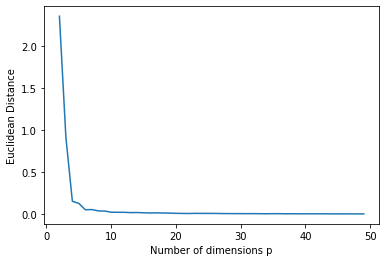

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math

deltas = []
for p in range(2,50):
    # Generate 1000 random points in p dimensions.
    P_set = [np.random.randint(-100, 100, p) for _ in range(10000)]
    Q = np.random.randint(-100,100, p)
    diffs = [np.linalg.norm(P-Q) for P in P_set]
    mxd = max(diffs)
    mnd = min(diffs)
    delta = math.log10(mxd-mnd)/mnd
    deltas.append(delta)

plt.plot(range(2,50),deltas)
plt.xlabel('Number of dimensions p')
plt.ylabel('Euclidean Distance')
plt.show()

#### Distances to nearest and farthest points as $p$ increases <a name="p"></a>

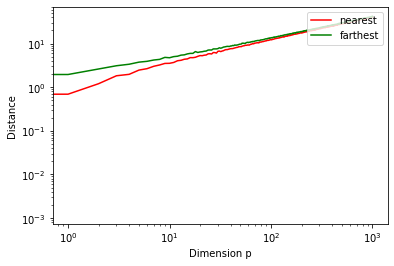

In [68]:
def generate_data(dimension, num_points, seed):
    ''' Generate random data points within [0, 1] for each coordinate in the given dimension '''
    np.random.seed(seed) 
    data = np.random.rand(num_points, dimension)
    return data


def neighbors(data, query_point):
    ''' Returns the nearest and farthest point in data from query_point '''
    nearest_distance = float('inf')
    farthest_distance = 0
    for point in data:
        distance = np.linalg.norm(point - query_point)
        if distance < nearest_distance:
            nearest_distance = distance
        if distance > farthest_distance:
            farthest_distance = distance
    return nearest_distance, farthest_distance


#define a point Q
seed = 0
dimensions = 10000
num_points = 199

data = generate_data(dimensions, num_points, seed)
data.shape
Q = data[1]
neighbors(data, Q)

#vary
seed = 192847
nearest_dist=[]
farthest_dist=[]

for dimensions in range(1, 10000, 10):
    data = generate_data(dimensions, num_points, seed) 
    Q_projected= Q[0:dimensions]
    (nd,fd) = neighbors(data, Q_projected)
    nearest_dist.append(nd)
    farthest_dist.append(fd)
    
import matplotlib.pyplot as plt

 
# convert axis to Logarithmic scale
plt.yscale("log")
plt.xscale("log")
plt.plot(nearest_dist, color='r', label='nearest')
plt.plot(farthest_dist, color='g', label='farthest')
plt.xlabel("Dimension p")
plt.ylabel("Distance")
#plt.title("Sine and Cosine functions")
plt.legend(loc="upper right")

#plt.ylim((, top))

## 3.2 Mitigation Strategies <a name="mitigation"></a>
The curse of dimensionality implies that adding more features to a dataset can lead to diminishing returns and potentially worse performance if the model overfits the data. To mitigate these effects, several strategies can be employed: 

* **Regularization**: Add a penalty term to the learning algorithm to constrain the model complexity, thereby preventing overfitting. Examples include Ridge regression, Lasso regression, and Elastic Net. 

* **Feature Selection**: Select a subset of relevant features that contribute most to the predictive power of the model. Techniques include mutual information, recursive feature elimination, and regularization methods like Lasso. 

* **Dimensionality Reduction**: Transform the high-dimensional feature space into a lower-dimensional space while preserving the important information. Common techniques include Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), and t-Distributed Stochastic Neighbor Embedding (t-SNE). 

* **Increase Training Data**: Collect more training samples to provide sufficient coverage of the high-dimensional space. This can be challenging and expensive but is often necessary for high-dimensional data.



## 3.3 Regularization 
Regularization is ubiquitous in machine learning. Most scikit-learn estimators have a parameter to tune the amount of regularization. 



### Regularization in linear regression

Generate data from a 9th order polynomial (the ground truth):

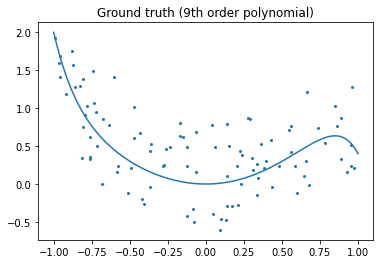

In [69]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import linear_model

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


rng = np.random.RandomState(0)
x = 2*rng.rand(100) - 1

f = lambda t: 1.2 * t**2 + .1 * t**3 - .4 * t **5 - .5 * t ** 9
y = f(x) + .4 * rng.normal(size=100)

x_test = np.linspace(-1, 1, 100)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis('tight')
plt.title('Ground truth (9th order polynomial)')

plt.show()

Fitting 4th and 9th order polynomials

Text(0.5, 1.0, 'Fitting a 4th and a 9th order polynomial')

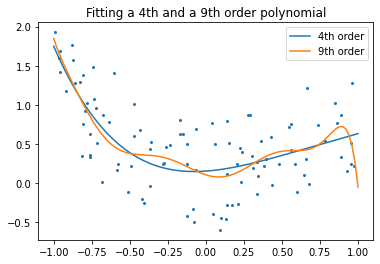

In [70]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr4 = linear_model.LinearRegression()
regr4.fit(X, y)
plt.plot(x_test, regr4.predict(X_test), label='4th order')

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr9 = linear_model.LinearRegression()
regr9.fit(X, y)
plt.plot(x_test, regr9.predict(X_test), label='9th order')

plt.legend(loc='best')
plt.axis('tight')
plt.title('Fitting a 4th and a 9th order polynomial')

### Ridge

### Lasso

### Elastic Net

### Regularization in kNN
For instance, with kNN, it is ‘k’, the number of nearest neighbors used to make the decision. k=1 amounts to no regularization: 0 error on the training set, whereas large k will push toward smoother decision boundaries in the feature space.

## 3.4 Feature selection

### Univariate Feature selection
 
Select the best features based on univariate statistical tests.
We can use a F-test to retrieve the two best features for a dataset as follows:

In [71]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X, y = load_iris(return_X_y=True)
X.shape
(150, 4)
X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
X_new.shape
(150, 2)

(150, 2)

* For classification: 
    * chi2: should only be applied to non-negative features, such as frequencies;
    * f_classif: F test to estimate how well a feature discriminates the different classes or - somewhat improperly - according to a feature, how far two classes are from each other (see this answer)[https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w]. In this case the statistic is $F =\frac{Explained variance}{unexplained variance}$; it follows the F distribution.
    * mutual_info_classif.


* For regression: 
    * r_regression;
    * f_regression: the statistic is $F (feature j)= \frac{ (the residual sum of squares of the model with just a constant) - (the residual sum of square of the model with just one feature, the j-th feature)}{(the residual sum of square of the model with a constant and just one feature, the j-th feature)}, testing whether differences between a model build using the given feature significantly and a model with no feature are due to chance or are sinificant -> used to rank features based on the significance value; **captures linear dependencies**;
 
    * mutual_info_regression: mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.


Reminder: F-test compare the variances of two samples or the ratio of variances between multiple samples.

##### Compare LinearSVC (SVM for classification) with and without univariate feature selection
Improve classification accuracy on a noisy dataset.
Some noisy (non informative) features are added to the iris dataset. Support vector machine (SVM) is used to classify the dataset both before and after applying univariate feature selection. For each feature, we plot the p-values for the univariate feature selection and the corresponding weights of SVMs. With this, we will compare model accuracy and examine the impact of univariate feature selection on model weights.

In [72]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [73]:
E.shape

(150, 20)

Univariate feature selection with F-test for feature scoring. We use the default selection function to select the four most significant features.

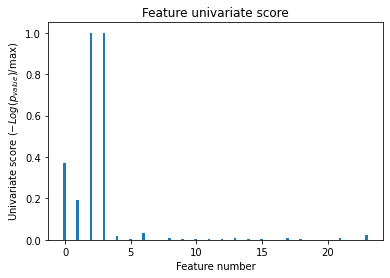

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$/max)")
plt.show()

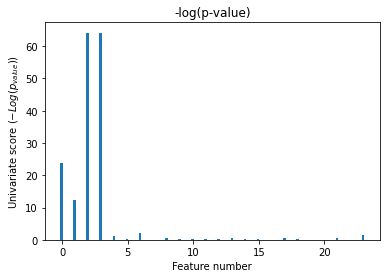

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()

import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("-log(p-value)")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

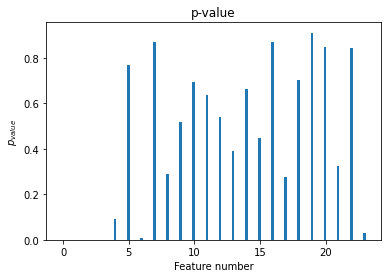

In [76]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = selector.pvalues_
#scores /= scores.max()

import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("p-value")
plt.xlabel("Feature number")
plt.ylabel(r"$p_{value}$")
plt.show()

#### Compare with SVMs
Without univariate feature selection

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()


Classification accuracy without selecting features: 0.789


After univariate feature selection

In the total set of features, only the 4 of the original features are significant. We can see that they have the highest score with univariate feature selection.

Classification accuracy after univariate feature selection: 0.868


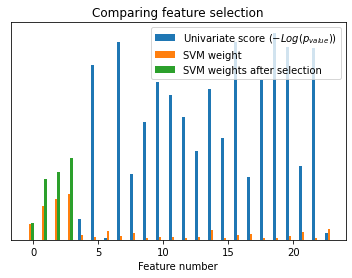

In [78]:
clf_selected = make_pipeline(SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC())
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(
    X_indices - 0.45, scores, width=0.2, label=r"Univariate score ($-Log(p_{value})$)"
)

plt.bar(X_indices - 0.25, svm_weights, width=0.2, label="SVM weight")

plt.bar(
    X_indices[selector.get_support()] - 0.05,
    svm_weights_selected,
    width=0.2,
    label="SVM weights after selection",
)

plt.title("Comparing feature selection")
plt.xlabel("Feature number")
plt.yticks(())
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()

Without univariate feature selection, the SVM assigns a large weight to the first 4 original significant features, but also selects many of the non-informative features. Applying univariate feature selection before the SVM increases the SVM weight attributed to the significant features, and will thus improve classification.

### Feature selection: Removing features with low variance

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have **a dataset with boolean features**, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by
$Var[X]=p(1-p)$

so we can select using the threshold .8 * (1 - .8):

In [79]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

As expected, VarianceThreshold has removed the first column, which has a probability $p=5/6>.8$
 of containing a zero.


### Feature selection: Recursive feature elimination
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features. In more details, the number of features selected is tuned automatically by fitting an RFE selector on the different cross-validation splits (provided by the cv parameter). The performance of the RFE selector are evaluated using scorer for different number of selected features and aggregated together. Finally, the scores are averaged across folds and the number of features selected is set to the number of features that maximize the cross-validation score.

#### Recursive feature elimination with cross-validation
We build a classification task using 3 informative features. The introduction of 2 additional redundant (i.e. correlated) features has the effect that the selected features vary depending on the cross-validation fold. The remaining features are non-informative as they are drawn at random.
After data generation, we create the RFE object and compute the cross-validated scores. The scoring strategy “accuracy” optimizes the proportion of correctly classified samples.

In [80]:
# Data generation

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=3,
    n_redundant=2, #These features are generated as random linear combinations of the informative features.
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    class_sep=0.8, #Larger values spread out the clusters/classes and make the classification task easier.
    random_state=0,
)

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression 
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
#clf = LinearSVC()
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select, 
    #This number of features will always be scored, 
    #even if the difference between the original feature count 
    #and min_features_to_select isn’t divisible by step.
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 3


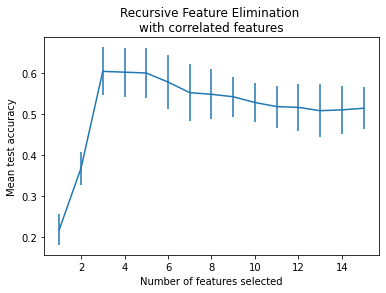

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=range(1,16), #cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In the present case, the model with 3 features (which corresponds to the true generative model) is found to be optimal. From the plot above one can further notice a plateau of equivalent scores (similar mean value and overlapping errorbars) for 3 to 5 selected features. This is the result of introducing correlated features. Indeed, the optimal model selected by the RFE can lie within this range, depending on the cross-validation technique. The test accuracy decreases above 5 selected features: keeping non-informative features leads to over-fitting and is therefore detrimental for the statistical performance of the models.

### Feature selection: Feature agglomeration
#### Feature agglomeration vs. univariate selection
This example compares 2 dimensionality reduction strategies:

* univariate feature selection 

* feature agglomeration with Ward hierarchical clustering

Both methods are compared in a regression problem using a BayesianRidge as supervised estimator.

In [82]:
import shutil
import tempfile

import matplotlib.pyplot as plt
import numpy as np
from joblib import Memory
from scipy import linalg, ndimage

from sklearn import feature_selection
from sklearn.cluster import FeatureAgglomeration
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.linear_model import BayesianRidge

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline

# set parameters
n_samples = 200
size = 40  # image size
roi_size = 15
snr = 5.0
np.random.seed(0)

# generate data
coef = np.zeros((size, size))
coef[0:roi_size, 0:roi_size] = -1.0
coef[-roi_size:, -roi_size:] = 1.0

X = np.random.randn(n_samples, size**2)
for x in X:  # smooth data
    x[:] = ndimage.gaussian_filter(x.reshape(size, size), sigma=1.0).ravel()
X -= X.mean(axis=0)
X /= X.std(axis=0)

y = np.dot(X, coef.ravel())

# add noise
noise = np.random.randn(y.shape[0])
noise_coef = (linalg.norm(y, 2) / np.exp(snr / 20.0)) / linalg.norm(noise, 2)
y += noise_coef * noise

In [83]:
#Compute the coefs of a Bayesian Ridge with GridSearch
cv = KFold(2)  # cross-validation generator for model selection
#ridge = BayesianRidge()

SV=LinearSVC()

cachedir = tempfile.mkdtemp()
mem = Memory(location=cachedir, verbose=1)

# Ward agglomeration followed by BayesianRidge

connectivity = grid_to_graph(n_x=size, n_y=size)
ward = FeatureAgglomeration(n_clusters=10, connectivity=connectivity, memory=mem)

clf = Pipeline([("ward", ward), ("ridge", ridge)])

# Select the optimal number of parcels with grid search
clf = GridSearchCV(clf, {"ward__n_clusters": [10, 20, 30]}, n_jobs=1, cv=cv)
clf.fit(X, y)  # set the best parameters
coef_ = clf.best_estimator_.steps[-1][1].coef_
coef_ = clf.best_estimator_.steps[0][1].inverse_transform(coef_)
coef_agglomeration_ = coef_.reshape(size, size)

# Anova univariate feature selection followed by BayesianRidge
f_regression = mem.cache(feature_selection.f_regression)  # caching function
anova = feature_selection.SelectPercentile(f_regression)

clf = Pipeline([("anova", anova), ("ridge", ridge)])

# Select the optimal percentage of features with grid search
clf = GridSearchCV(clf, {"anova__percentile": [5, 10, 20]}, cv=cv)
clf.fit(X, y)  # set the best parameters
coef_ = clf.best_estimator_.steps[-1][1].coef_
coef_ = clf.best_estimator_.steps[0][1].inverse_transform(coef_.reshape(1, -1))
coef_selection_ = coef_.reshape(size, size)

________________________________________________________________________________
[Memory] Calling sklearn.cluster._agglomerative.ward_tree...
ward_tree(array([[-0.451933, ..., -0.675318],
       ...,
       [ 0.275706, ..., -1.085711]]), connectivity=<1600x1600 sparse matrix of type '<class 'numpy.int64'>'
	with 7840 stored elements in COOrdinate format>, n_clusters=None, return_distance=False)
________________________________________________________ward_tree - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.cluster._agglomerative.ward_tree...
ward_tree(array([[ 0.905206, ...,  0.161245],
       ...,
       [-0.849835, ..., -1.091621]]), connectivity=<1600x1600 sparse matrix of type '<class 'numpy.int64'>'
	with 7840 stored elements in COOrdinate format>, n_clusters=None, return_distance=False)
________________________________________________________ward_tree - 0.0s, 0.0min
__________________________________________

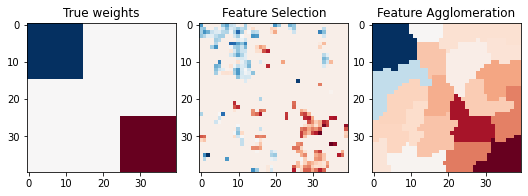

In [84]:
# Inverse the transformation to plot the results on an image

plt.close("all")
plt.figure(figsize=(7.3, 2.7))
plt.subplot(1, 3, 1)
plt.imshow(coef, interpolation="nearest", cmap=plt.cm.RdBu_r)
plt.title("True weights")
plt.subplot(1, 3, 2)
plt.imshow(coef_selection_, interpolation="nearest", cmap=plt.cm.RdBu_r)
plt.title("Feature Selection")
plt.subplot(1, 3, 3)
plt.imshow(coef_agglomeration_, interpolation="nearest", cmap=plt.cm.RdBu_r)
plt.title("Feature Agglomeration")
plt.subplots_adjust(0.04, 0.0, 0.98, 0.94, 0.16, 0.26)
plt.show()

While feature aggregation takes correlations between features into account and aggregates them, univariate selection handles each feature individually and chooses or ranks them according to unique qualities.

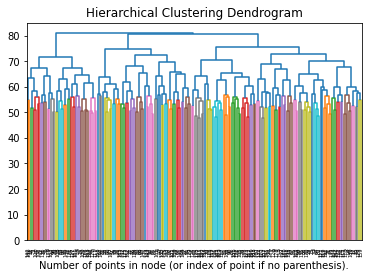

In [85]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
#model = AgglomerativeClustering(n_clusters=10)
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model)#, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#### Note
In the next class: feature importance